### Group Contributions Statement

Placeholder

### Data import and cleaning

In [107]:
import ssl#my computer is weird and only imports files given this command delete before turning in
ssl._create_default_https_context = ssl._create_unverified_context #my computer is weird and only imports files given this command delete before turning in
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

url = "https://philchodrow.github.io/PIC16A/content/IO_and_modules/IO/palmer_penguins.csv"
penguins = pd.read_csv(url)
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [108]:
X = penguins[['Island','Culmen Length (mm)','Clutch Completion','Culmen Depth (mm)',
              'Flipper Length (mm)','Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
y = penguins['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((275, 9), (69, 9), (275,), (69,))

In [109]:
def cleanX(penguins): 
    # drop unnecessary columns
    penguins = penguins.dropna()
    
    # recode sex column labels into integers
    recode_sex = {"MALE" : 0, "FEMALE" : 1, "." : 2} 
    penguins["Sex"] = penguins["Sex"].map(recode_sex) 
    penguins = penguins[penguins['Sex'] != 2]
    
    # recode island column labels into integers
    recode_island = {'Biscoe' : 0, 'Dream' : 1, 'Torgersen' : 3} 
    penguins["Island"] = penguins["Island"].map(recode_island)
    le = preprocessing.LabelEncoder()
    
    # clutch competition
    penguins['Clutch Completion'] = le.fit_transform(penguins['Clutch Completion'])
    
    return penguins

def cleanY(penguins):
    # drop unnecessary columns
    penguins = penguins.dropna()
    recode_sex = {"Adelie Penguin (Pygoscelis adeliae)" : 0, "Chinstrap penguin (Pygoscelis antarctica)" : 1, "Gentoo penguin (Pygoscelis papua)" : 2} 
    penguins = penguins.map(recode_sex)
    return penguins
X_train=cleanX(X_train)
X_test=cleanX(X_test)
y_train=cleanY(y_train)
y_test=cleanY(y_test)

C:\Users\Wiggles\AppData\Local\Temp/ipykernel_22748/798065650.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins["Sex"] = penguins["Sex"].map(recode_sex)
C:\Users\Wiggles\AppData\Local\Temp/ipykernel_22748/798065650.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins["Sex"] = penguins["Sex"].map(recode_sex)
C:\Users\Wiggles\AppData\Local\Temp/ipykernel_22748/798065650.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [110]:
new_train_index = [index for index in X_train.index if index in y_train.index]
y_train = y_train.loc[new_train_index]
new_test_index = [index for index in X_test.index if index in y_test.index]
y_test = y_test.loc[new_test_index]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((260, 9), (64, 9), (260,), (64,))

In [111]:
X_train.head()

,Island,Culmen Length (mm),Clutch Completion,Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
66,0,35.5,1,16.2,195.0,3350.0,1,8.56192,-25.95541
229,0,46.8,1,15.4,215.0,5150.0,0,8.16310,-25.38017
7,3,39.2,0,19.6,195.0,4675.0,0,9.46060,-24.89958
140,1,40.2,1,17.1,193.0,3400.0,1,9.28810,-25.54976
323,0,49.1,1,15.0,228.0,5500.0,0,8.65914,-25.79203


### Exploratory Analysis

In [112]:
train = pd.concat([X_train,y_train], axis=1)
test = pd.concat([X_test,y_test], axis=1)
penguins = pd.concat([train,test], axis=0)
penguins

,Island,Culmen Length (mm),Clutch Completion,Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
66,0,35.5,1,16.2,195.0,3350.0,1,8.56192,-25.95541,0
229,0,46.8,1,15.4,215.0,5150.0,0,8.16310,-25.38017,2
7,3,39.2,0,19.6,195.0,4675.0,0,9.46060,-24.89958,0
140,1,40.2,1,17.1,193.0,3400.0,1,9.28810,-25.54976,0
323,0,49.1,1,15.0,228.0,5500.0,0,8.65914,-25.79203,2
...,...,...,...,...,...,...,...,...,...,...
321,0,55.9,1,17.0,228.0,5600.0,0,8.31180,-26.35425,2
172,1,42.4,1,17.3,181.0,3600.0,1,9.35138,-24.68790,1
73,3,45.8,1,18.9,197.0,4150.0,0,8.18658,-26.45978,0
76,3,40.9,1,16.8,191.0,3700.0,1,8.47257,-26.02002,0


Text(0.5, 0.98, 'Culmen Depth vs Culmen Length')

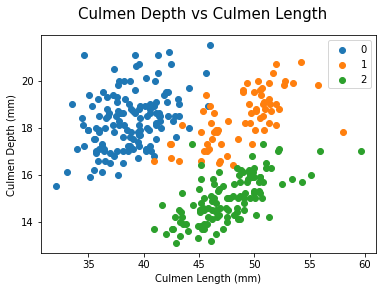

In [113]:
fig, ax = plt.subplots(1)
species = set(penguins['Species'])

for s in species:
    i = penguins[penguins['Species'] == s]
    ax.scatter(i['Culmen Length (mm)'], i['Culmen Depth (mm)'], label = s)

ax.legend()

ax.set(xlabel = 'Culmen Length (mm)',
       ylabel = 'Culmen Depth (mm)')

fig.suptitle('Culmen Depth vs Culmen Length', fontsize=15)


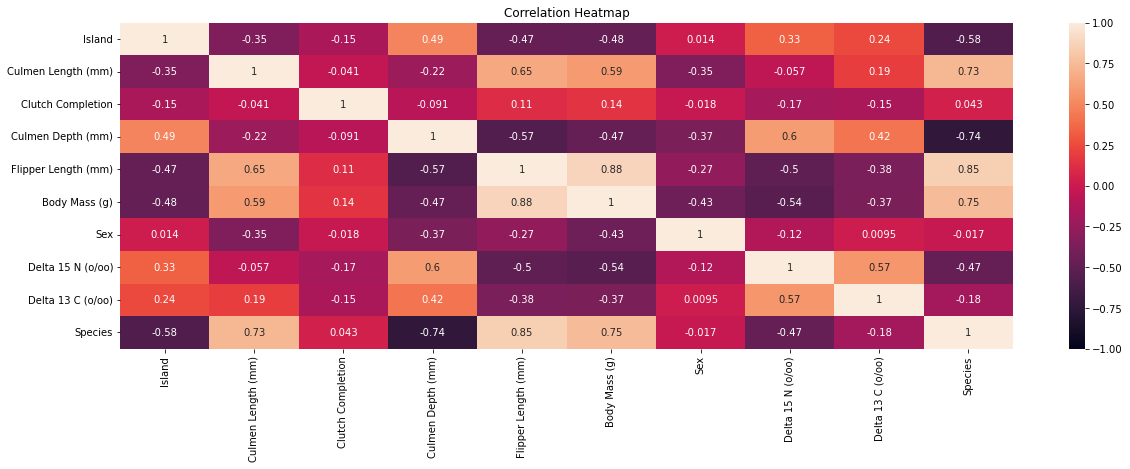

In [114]:
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(penguins.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')
plt.show()


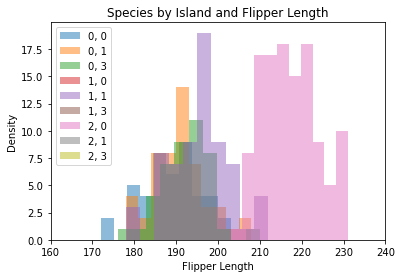

In [115]:
fig.set_figheight(15)
fig.set_figwidth(10)

fig, ax = plt.subplots(1) 
species = set(penguins['Species']) 
location = set(penguins['Island'])

ax.set(xlabel = 'Flipper Length', 
       ylabel = 'Density',
       title = 'Species by Island and Flipper Length')

for s in species:
    i = penguins[penguins['Species'] == s] 
    for l in location:
        t = i[i['Island'] == l]
        ax.hist(t['Flipper Length (mm)'], label = str(s) + ', ' + str(l) , alpha = 0.5) 
        ax.set_xlim([160,240])

        ax.legend()


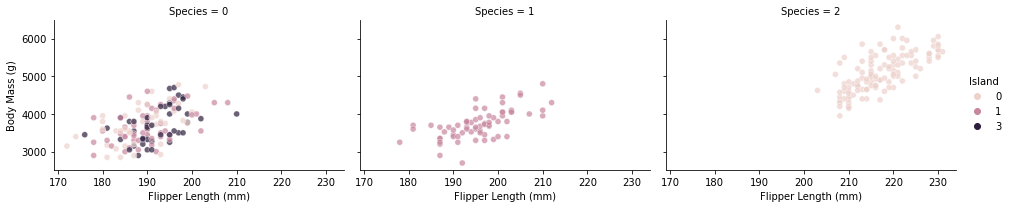

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
fgrid = sns.relplot(x = 'Flipper Length (mm)', 
                    y = 'Body Mass (g)', 
                    hue = "Island", 
                    data = penguins,
                    alpha = .7,
                    col = "Species",
                    height = 3,
                    aspect = 1.5)

### Feature Selection

Based on the data we've gotten from above we've decided that Culmen Depth, Culmen Length, and Island were most appropriate for our future models as they had the highest correlation with species in our heatmap.

### Modeling

In [117]:
X_train = X_train[['Culmen Depth (mm)', 'Culmen Length (mm)', 'Island']]
X_test = X_test[['Culmen Depth (mm)', 'Culmen Length (mm)', 'Island']]

In [118]:
'''function that makes a confusion matrix using predicted values as compared to actual values'''
def makeCM(y_pred):
    from sklearn.metrics import confusion_matrix

    import seaborn as sns
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues_r')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('Predicted Species')
    ax.set_ylabel('Actual Species');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['0','1','2'])
    ax.yaxis.set_ticklabels(['0','1','2'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

Neural Network

0.96875
0.9653846153846154


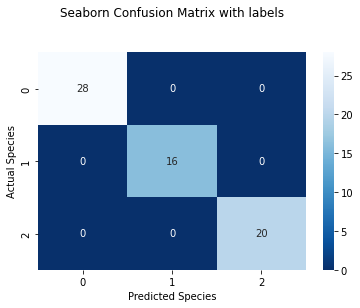

In [119]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(10, 2), random_state=1)
bestmodel = clf.fit(X_train, y_train)
print(bestmodel.score(X_test, y_test))
print(bestmodel.score(X_train, y_train))

makeCM(y_test)

In [125]:
from matplotlib.colors import LinearSegmentedColormap
def plot_decision_boundary(model):
    qualitative_fts_names = list(set(penguins['Island']))
    qualitative_fts_names.sort()
    qualitative_fts = list(set(X['Island']))
    species_names = ['Adelie','Chinstrap','Gentoo']
    species_col = ['red','green','blue']
    masks = []
    for i in range(len(qualitative_fts)):
        masks.append(X['Island'] == qualitative_fts[i])

    for i in range(len(masks)):
        xi = X[masks[i]]
        x0 = xi[['Culmen Length (mm)','Flipper Length (mm)','Island'][0]]
        x1 = xi[['Culmen Length (mm)','Flipper Length (mm)','Island'][1]]
        yi = y['Species'][masks[i]]
        grid_x = np.linspace(x0.min(),x0.max(),501)
        grid_y = np.linspace(x1.min(),x1.max(),501)
        z = qualitative_fts[i]*np.ones(501*501)
        xx,yy = np.meshgrid(grid_x,grid_y)

        XX = xx.ravel()
        YY = yy.ravel()
        ZZ = z.ravel()

        p = model.predict(pd.DataFrame(np.c_[XX,YY,ZZ],columns=['Culmen Length (mm)','Flipper Length (mm)','Island']))
        p_values = list(set(p))
        yi_values = list(set(yi))
        color_list_region = []
        color_list_scatter = []
        for j in range(len(p_values)): 
            color_list_region.append(species_col[p_values[j]])
        for k in range(len(yi_values)): 
            color_list_scatter.append(species_col[yi_values[k]])

        self_cmap_region = LinearSegmentedColormap.from_list('mycmap',color_list_region)
        self_cmap_scatter = LinearSegmentedColormap.from_list('mycmap',color_list_scatter)

        p=p.reshape(xx.shape)

        fig,ax = plt.subplots(1)

        ax.contourf(xx,yy,p,cmap=self_cmap_region,alpha=.2)

        for s in range(len(yi_values)): 
            maskl = yi==yi_values[s]
            ax.scatter(x0[maskl], x1[maskl], color=species_col[yi_values[s]], label=species_names[yi_values[s]])
            #set the title and label our axis
            ax.set(title="Island"+': '+ qualitative_fts_names[i])
            ax.set(xlabel = [0], ylabel = ['Culmen Length (mm)','Flipper Length (mm)','Island'][1])
            ax.legend()

In [126]:
plot_decision_boundary(bestmodel)

KeyError: 'Species'

### Discussion